In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import networkx as nx

In [2]:
path = Path("data/coauth-DBLP")

In [3]:
def load_hypergraph(nverts_path, simplices_path):
    # Load number of vertices per simplex
    with open(nverts_path, 'r') as f:
        nverts = [int(line.strip()) for line in f]

    # Load flattened list of simplex vertices
    with open(simplices_path, 'r') as f:
        simplices_flat = [int(line.strip()) for line in f]

    # Reconstruct hyperedges
    hyperedges = []
    idx = 0
    for n in nverts:
        hyperedges.append(simplices_flat[idx:idx + n])
        idx += n

    return hyperedges

In [4]:
hyperedges = load_hypergraph(path / 'coauth-DBLP-nverts.txt', path / 'coauth-DBLP-simplices.txt')

In [5]:
# for i, hyperedge in enumerate(hyperedges[:20]):
#     print(f"Hyperedge {i+1}: {hyperedge}")

number_hyperedges = len(hyperedges)

G = nx.Graph()
for hyperedge_idx, hyperedge in enumerate(hyperedges[:20]):
    for node_idx_local in hyperedge:
        node_idx_global = node_idx_local + number_hyperedges
        G.add_edge(hyperedge_idx, node_idx_global)

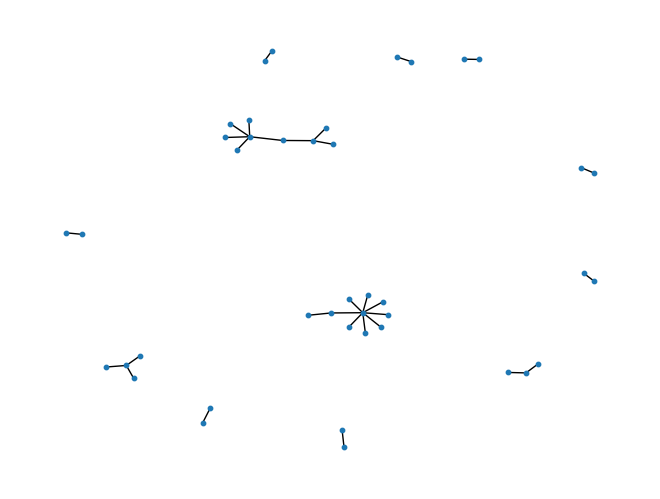

In [6]:
nx.draw(G, node_size=10)

In [25]:
def build_bipartite_hypergraph(hyperedges):
    B = nx.Graph()
    vertex_nodes = set()
    hyperedge_nodes = []

    for i, edge in enumerate(hyperedges[:20]):
        hedge_node = f"e{i}"  # name hyperedge nodes as strings: e0, e1, ...
        hyperedge_nodes.append(hedge_node)
        for v in edge:
            B.add_edge(hedge_node, v)
            vertex_nodes.add(v)

    return B, vertex_nodes, hyperedge_nodes

B, verts, hedges  = build_bipartite_hypergraph(hyperedges)

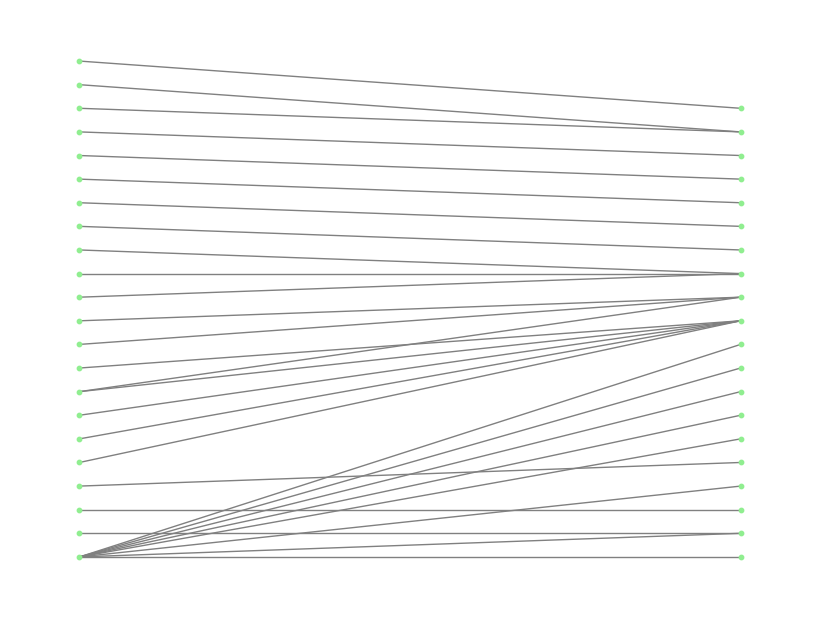

In [26]:
pos = {}
pos.update((v, (1, i)) for i, v in enumerate(verts))       # original vertices on one line
pos.update((h, (2, i)) for i, h in enumerate(hedges))      # hyperedges on another

plt.figure(figsize=(8, 6))
nx.draw(B, pos, with_labels=False, node_color='lightgreen', edge_color='gray', node_size=10)
plt.show()

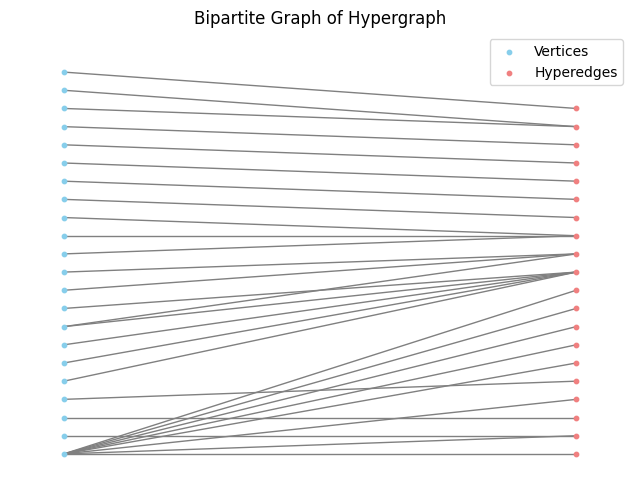

In [27]:
pos = {}
pos.update((v, (1, i)) for i, v in enumerate(verts))    # vertices
pos.update((h, (2, i)) for i, h in enumerate(hedges))   # hyperedges

# Draw nodes in different colors
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(B, pos, nodelist=verts, node_color='skyblue', label='Vertices', node_size=10)
nx.draw_networkx_nodes(B, pos, nodelist=hedges, node_color='lightcoral', label='Hyperedges', node_size=10)
nx.draw_networkx_edges(B, pos, edge_color='gray')
# nx.draw_networkx_labels(B, pos)

plt.legend(loc='upper right')
plt.title("Bipartite Graph of Hypergraph")
plt.axis('off')
plt.show()